In [49]:
import matplotlib.pyplot as plt

%matplotlib inline
# magic function

In [50]:
import numpy as np
import healpy as hp
from pylab import cm

In [75]:
from astropy.io import fits


In [51]:
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

#NSIDE defines the resolution of the map, usually a power of 2

Approximate resolution at NSIDE 32 is 1.8 deg


In [52]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

#NPIX gives the number of pixels of the map

12288


0.0 180.0 -180.0 180.0


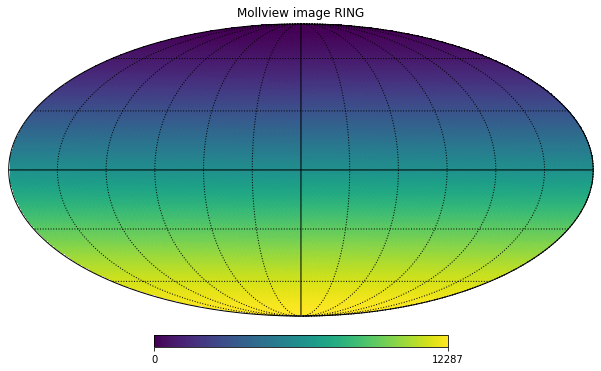

In [53]:
m = np.arange(NPIX, dtype=float)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

#RING configuration of the ordering of pixels 
#graticule provides the grid lines, however doesnt work at the moment.
#RING ordering is needed for the spherical harmonic transforms.

In [54]:
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

#representing the standard coordinates (colattitude theta and longitude phi) as a vector

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


In [55]:
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

#finds the indicies of all pixels within 10 degrees of the defined vector point
#and changes the value of the map at that location 

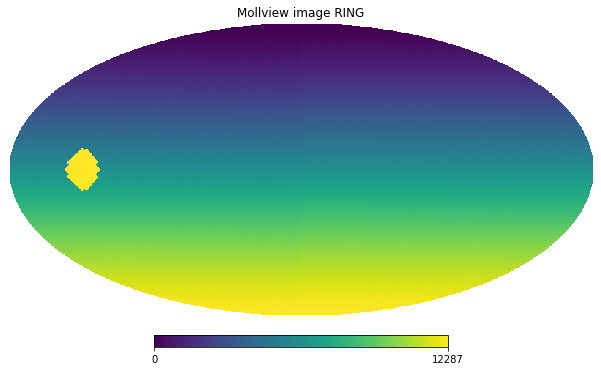

In [56]:
m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")

In [57]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0, 1, 2, 3, 4]))

#pix2ang retrieves the colattitude and longtidue of each pixel

In [58]:
theta

array([1.46197116, 1.46197116, 1.46197116, 1.46197116, 2.92418036])

In [59]:
phi

array([ 45. , 135. , 225. , 315. ,  22.5])

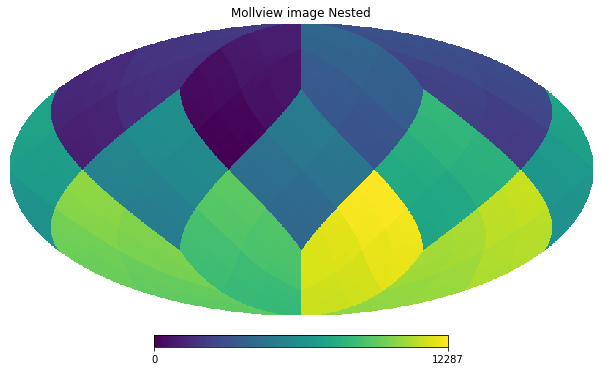

In [60]:
m = np.arange(NPIX)
# m[50:100] = hp.UNSEEN
hp.mollview(m, nest=True, title="Mollview image Nested")

#NESTED ordering is an efficient way for map operations 
#All healpy routines assume RING ordering, hence why 'nest=True' is required 
#for a NESTED ordering

In [61]:
#wmap_map_I = hp.read_map("wmap_band_iqumap_r9_7yr_W_v4.fits")
wmap_map_I = hp.read_map("DESY3_wiener_filter_kappa.fits")

#retrieves the WMAP data into current directory

In [76]:
wiener_kappa = fits.open('DESY3_wiener_filter_kappa.fits')[1].data['WF_E_noise']

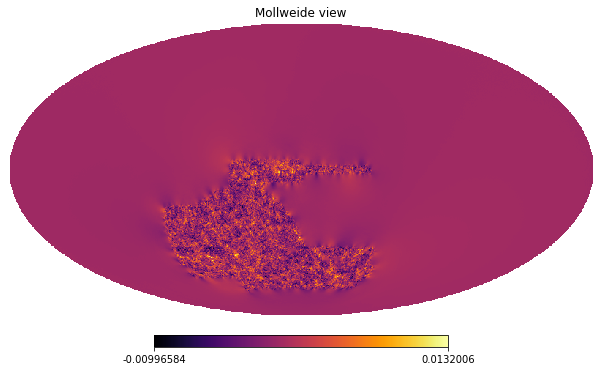

In [78]:
hp.mollview(wiener_kappa, cmap="inferno")

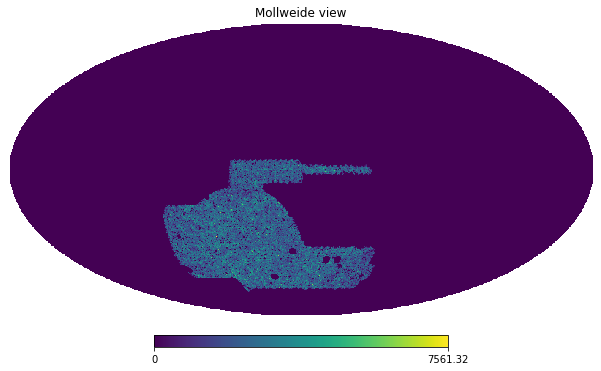

In [63]:
hp.mollview(wmap_map_I)

In [64]:
hp.write_map("my_map.fits", wmap_map_I, overwrite=True)

setting the output map dtype to [dtype('>f8')]


0.0 180.0 -180.0 180.0


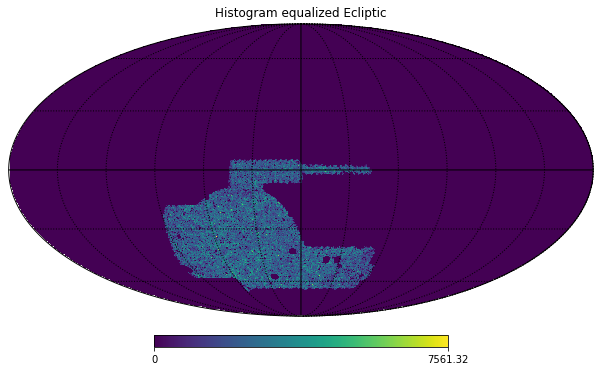

In [67]:
hp.mollview(
    wmap_map_I,
    title="Histogram equalized Ecliptic",
)
hp.graticule()



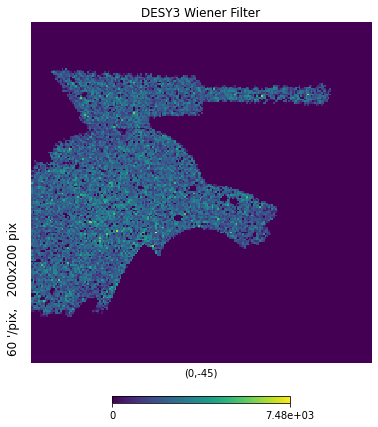

In [74]:
hp.gnomview(wmap_map_I, rot=[0, -45], reso=60, title="DESY3 Wiener Filter")

#gnomview provieds a gnomonic projection around location specified by rot
#x/ysize changes dimensions of the patch of sky observed

#what does the format argument do??
#reso

In [81]:
#mask = hp.read_map("wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool_)
mask = hp.read_map("DESY3_sky_mask.fits").astype(np.bool_)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)
masked_map=np.where(mask==True, wiener_kappa, hp.UNSEEN)   #- when observed give it the data values else give the unseen values

#adds the temperature mask to the map, by convention the mask is 0 where
#the data are masked.
#Filling the masked array fills in the unseen values and returns a standard
#array that can be used as a mollweide projection

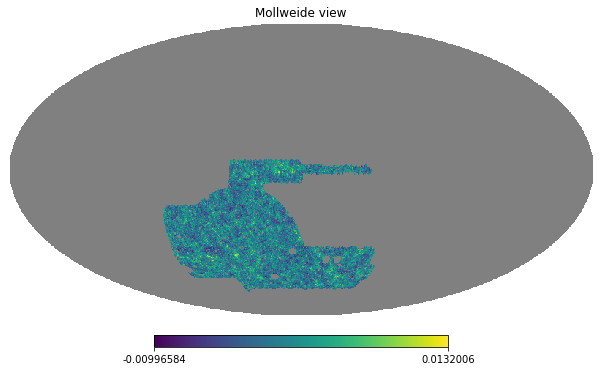

In [82]:
hp.mollview(masked_map)

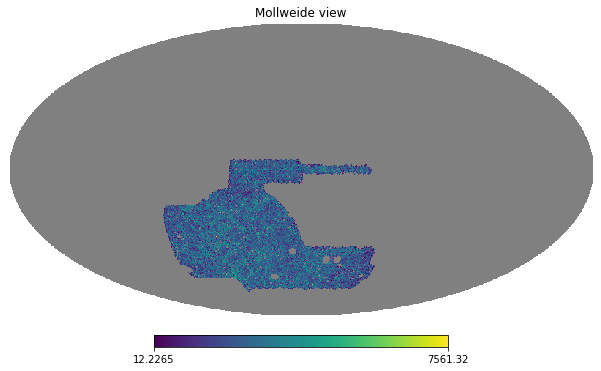

In [19]:
hp.mollview(wmap_map_I_masked.filled())


masked_array(
  data=[[2111.643186509817, 1678.8914171110287, 1946.2875016121548, ...,
         613.4437376366892, 1641.2769940318133, 1121.6166905380082],
        [2111.643186509817, 2141.6245024702066, 1946.2875016121548, ...,
         613.4437376366892, 551.5083731234467, 1121.6166905380082],
        [2141.6245024702066, 2141.6245024702066, 2141.6245024702066, ...,
         551.5083731234467, 551.5083731234467, 551.5083731234467],
        ...,
        [965.6698083281186, 965.6698083281186, 965.6698083281186, ...,
         --, --, --],
        [1625.5725650519828, 965.6698083281186, 1140.8229994559301, ...,
         --, --, --],
        [1534.426620699934, 1534.426620699934, 1534.426620699934, ...,
         --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, Fal

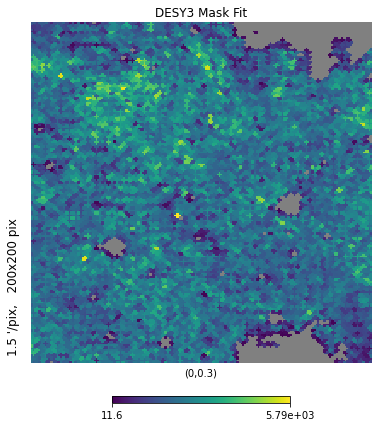

In [46]:
m[50:100] = hp.UNSEEN
#hp.UNSEEN=0
hp.gnomview(wmap_map_I_masked.filled(), rot=[0, 0.3], title="DESY3 Mask Fit", return_projected_map=True)
#return_projected_map = "TRUE"
#hp.graticule()


Text(0.5, 1.0, 'Histogram of DESY3 Masked Data')

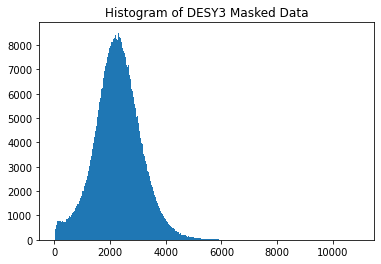

In [32]:
plt.hist(wmap_map_I_masked.compressed(), bins=1000);
plt.title("Histogram of DESY3 Masked Data")

#compressed() removes the masked pixels and returns a standard array that can
#be used by matplotlib as a histogram function

In [23]:
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

#hp.anafast is a nice tool for computing angular power spectra from maps

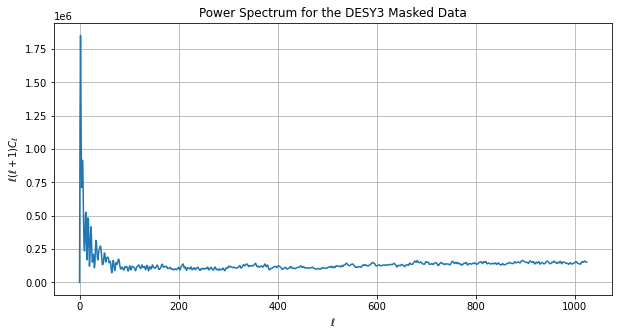

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell+1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.title("Power Spectrum for the DESY3 Masked Data")
plt.grid()
hp.write_cl("cl.fits", cl, overwrite=True)

#plots a normalised CMB spectrum and writes the file to disk

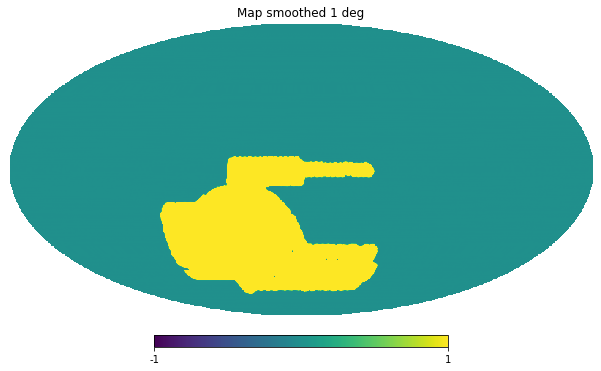

In [48]:
wmap_map_I_smoothed = hp.smoothing(wmap_map_I, fwhm=np.radians(1.))
hp.mollview(wmap_map_I_smoothed, min=-1, max=1, title="Map smoothed 1 deg")

#hp.smoothing is the function that smooths the Gaussian beam map

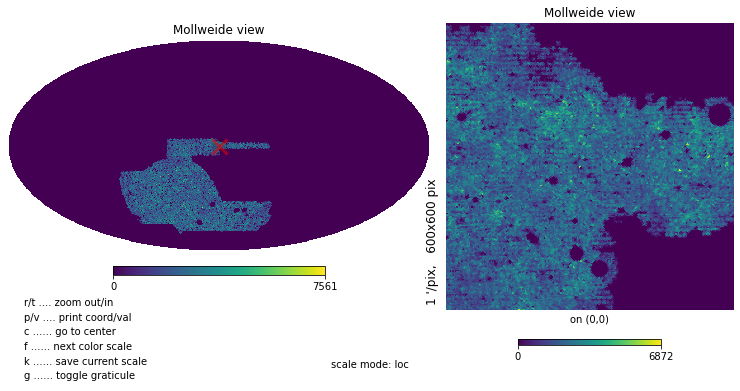

In [27]:
hp.zoomtool.mollzoom(wmap_map_I)

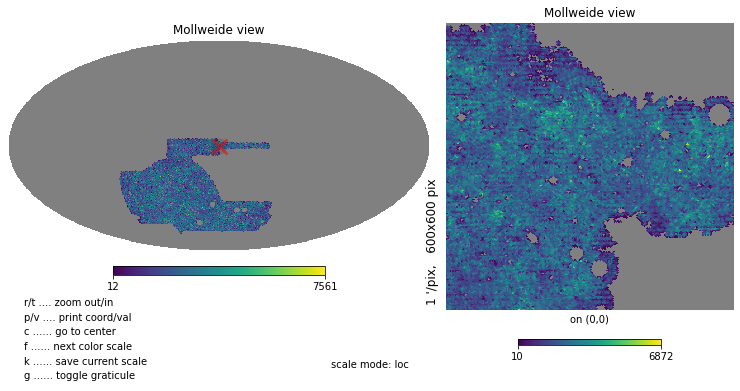

In [28]:
hp.zoomtool.mollzoom(wmap_map_I_masked.filled())

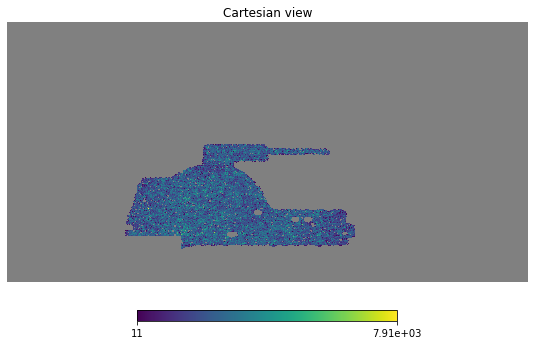

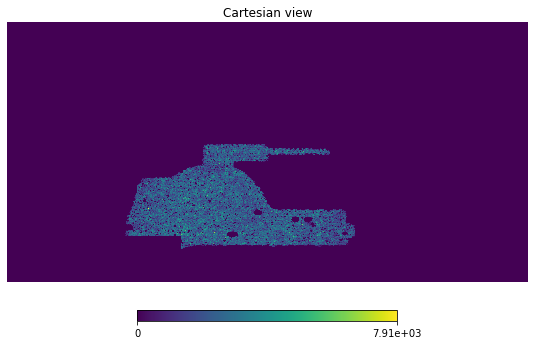

In [36]:
hp.cartview(wmap_map_I_masked.filled())
hp.cartview(wmap_map_I)

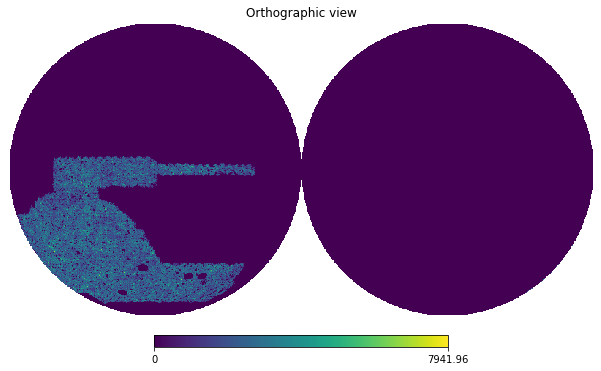

In [37]:
hp.orthview(wmap_map_I)